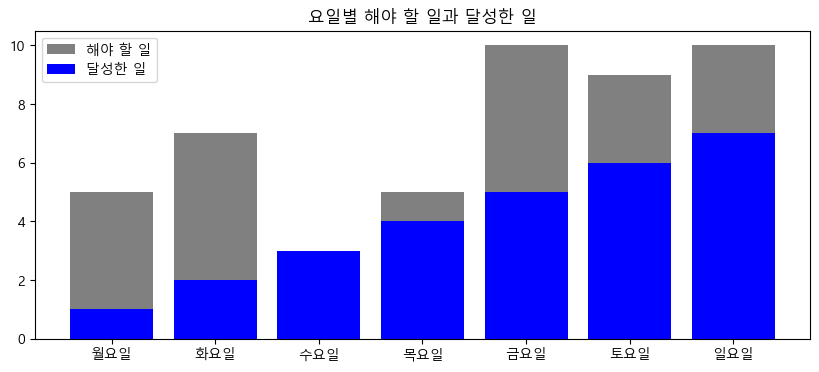

In [2]:
# 그래프
import tkinter as tk
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd

색깔="blue"

plt.rc('font', family='Malgun Gothic')
plt.rc("font", size=10)
plt.rc('axes', unicode_minus=False)

#요일
day=["월요일","화요일","수요일","목요일","금요일","토요일","일요일"]

#해야 할 일(숫자 임의로 씀)
goal=[5, 7, 3, 5, 10, 9, 10]

#달성한 일(숫자 임의로 씀)
achievement=[1, 2, 3, 4, 5, 6, 7]

데이터={"요일" : day, "해야 할 일" : goal, "달성한 일" : achievement}
table=pd.DataFrame(데이터)

root=tk.Tk()
root.title("주간 성취 그래프")
root.geometry("800x600")

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(table['요일'], table['해야 할 일'], color='grey', label='해야 할 일')
ax.bar(table["요일"], table["달성한 일"], color=색깔, label='달성한 일')
ax.set_title("요일별 해야 할 일과 달성한 일")
ax.legend()

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack()


In [ ]:
import re
from tkinter import messagebox



def is_time_conflict(day_idx, new_time):
    for item in default_values[day_idx]:
        if item.startswith(new_time):  # "HH:MM"이 겹치면 중복
            return True
    return False

def add_value(day_idx):
    raw = entry_vars[day_idx].get().strip()

    if not raw:
        return

    # "HH:MM 내용" 형식인지 확인
    match = re.match(r'^([0-2][0-9]:[0-5][0-9])\s(.+)$', raw)
    if not match:
        messagebox.showwarning("입력 오류", "시간은 'HH:MM 내용' 형식으로 입력하세요.\n예: 09:30 운동")
        return

    time, task = match.groups()

    # 중복 검사
    if is_time_conflict(day_idx, time):
        messagebox.showwarning("시간 중복", f"{day[day_idx]}요일에 {time}에 이미 일정이 있습니다!")
        return

    # 추가 및 UI 갱신
    default_values[day_idx].append(f"{time} {task}")
    default_values[day_idx].sort()
    entry_vars[day_idx].set("")
    refresh_day_values(day_idx)
